## 2. Analyze customer sentiment with NLP

### 1. Prepare workstation

In [ ]:
# install NLTK library
!pip install nltk

# Install vaderSentiment tool
!pip install VaderSentiment


In [35]:
# Install textblob
!pip install textblob

In [3]:
# Import all necessary libraries.
import nltk

# Install the required tokenisation model.
nltk.download('punkt')

# Install the required tokenisation function.
from nltk.tokenize import sent_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Kristina\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
import re
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Data Preprocessing

In [6]:
df= pd.read_csv('game_reviews.csv')
df.head()

,overall,verified,reviewTime,reviewerID,reviewerName,reviewText,summary,unixReviewTime,image
0,2,False,"09 22, 2016",A1IDMI31WEANAF,Mackenzie Kent,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...,1474502400,NaN
1,1,False,"09 18, 2016",A4BCEVVZ4Y3V3,Jonathan Christian,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...,1474156800,NaN
2,3,True,"09 12, 2016",A2EZ9PY1IHHBX0,unpreparedtodie,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless",1473638400,NaN
3,5,True,"03 02, 2017",A139PXTTC2LGHZ,Ashley,Amazing buy! Bought it as a gift for our new d...,Five Stars,1488412800,NaN
4,1,True,"02 08, 2017",A3IB33V29XIL8O,Oghma_EM,As my review of GF9's previous screens these w...,Money trap,1486512000,NaN


In [7]:
df.shape

(15000, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   overall         15000 non-null  int64 
 1   verified        15000 non-null  bool  
 2   reviewTime      15000 non-null  object
 3   reviewerID      15000 non-null  object
 4   reviewerName    15000 non-null  object
 5   reviewText      14990 non-null  object
 6   summary         14998 non-null  object
 7   unixReviewTime  15000 non-null  int64 
 8   image           160 non-null    object
dtypes: bool(1), int64(2), object(6)
memory usage: 952.3+ KB


In [9]:
# Dropping null values
df1=df


In [150]:
df1['overall'].value_counts()

5    11576
4     1836
3      727
1      503
2      358
Name: overall, dtype: int64

In [10]:
df1['overall'].value_counts(normalize=True) * 100

5    77.173333
4    12.240000
3     4.846667
1     3.353333
2     2.386667
Name: overall, dtype: float64

<AxesSubplot:xlabel='overall', ylabel='count'>

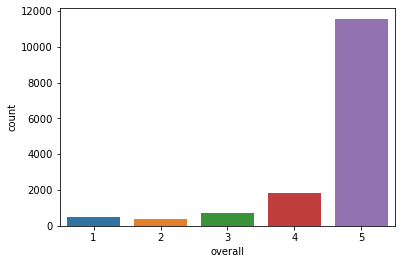

In [11]:
sns.countplot(data=df1, x='overall')

#### <font color='green'> KR : 89% of respondents gave 4 or 5s, if we add '3s' 94% gave positive responses  </font>


### 3. Data Preprocessing

In [12]:
from textblob import TextBlob
from textblob import Word
from nltk.corpus import stopwords

### A. Lower casing and removing punctuations

In [13]:
df1['Text1'] =df1['reviewText'].apply(lambda x:" ".join(x.lower() for x in str(x).split()))


In [14]:
df1['Text1'] =df1['Text1'].str.replace('[^\w\s]',"")

C:\Users\Kristina\AppData\Local\Temp\ipykernel_5540\1311721190.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['Text1'] =df1['Text1'].str.replace('[^\w\s]',"")


In [15]:
#checking text

df1['Text1'].head()

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: Text1, dtype: object

### B. Removal of stop words

In [16]:
stop=stopwords.words('english')
df1['Text1']=df1['Text1'].apply(lambda x: " ".join(x for x in str(x).split() if x not in stop))
df1['Text1'].head()

0    comes dms screen space screen absolute premium...
1    open letter galeforce9 unpainted miniatures ba...
2    nice art nice printing two panels filled gener...
3               amazing buy bought gift new dm perfect
4    review gf9s previous screens completely unnece...
Name: Text1, dtype: object

### C. Lemmatization

In [17]:
df1['Text1']=df1['Text1'].apply(lambda x: " ".join([Word(word).lemmatize() for word in str(x).split()]))
df1['Text1'].head()

0    come dm screen space screen absolute premium f...
1    open letter galeforce9 unpainted miniature bad...
2    nice art nice printing two panel filled genera...
3               amazing buy bought gift new dm perfect
4    review gf9s previous screen completely unneces...
Name: Text1, dtype: object

In [18]:
df1.shape

(15000, 10)

### 4. Sentiment score

In [ ]:
# Sentiment analysis: Pretrained model takes input from the text description and outputs the sentiment score ranging 
# from -1 to +1 for each sentince


In [19]:
# Import the necessary class.
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Create an object from the class.
analyzer = SentimentIntensityAnalyzer()

In [20]:
# Generating sentiment for all the sentence present in the dataset
emptyline=[]
for row in df1['Text1']:
    vs = analyzer.polarity_scores(row)
    emptyline.append(vs)
    
#Creating new dataframe with sentiments
df1_sentiments = pd.DataFrame(emptyline)
df1_sentiments

,neg,neu,pos,compound
0,0.310,0.646,0.044,-0.9152
1,0.204,0.544,0.252,0.7020
2,0.191,0.578,0.231,0.6606
3,0.000,0.278,0.722,0.8860
4,0.370,0.630,0.000,-0.7063
...,...,...,...,...
14995,0.529,0.471,0.000,-0.8399
14996,0.000,0.377,0.623,0.7650
14997,0.000,1.000,0.000,0.0000
14998,0.000,0.615,0.385,0.3612


In [21]:
# Merge the sentiments back to the original dataframe

df_all=pd.concat([df1.reset_index(drop=True), df1_sentiments], axis=1)
df_all

,overall,verified,reviewTime,reviewerID,reviewerName,reviewText,summary,unixReviewTime,image,Text1,neg,neu,pos,compound
0,2,False,"09 22, 2016",A1IDMI31WEANAF,Mackenzie Kent,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...,1474502400,NaN,come dm screen space screen absolute premium f...,0.310,0.646,0.044,-0.9152
1,1,False,"09 18, 2016",A4BCEVVZ4Y3V3,Jonathan Christian,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...,1474156800,NaN,open letter galeforce9 unpainted miniature bad...,0.204,0.544,0.252,0.7020
2,3,True,"09 12, 2016",A2EZ9PY1IHHBX0,unpreparedtodie,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless",1473638400,NaN,nice art nice printing two panel filled genera...,0.191,0.578,0.231,0.6606
3,5,True,"03 02, 2017",A139PXTTC2LGHZ,Ashley,Amazing buy! Bought it as a gift for our new d...,Five Stars,1488412800,NaN,amazing buy bought gift new dm perfect,0.000,0.278,0.722,0.8860
4,1,True,"02 08, 2017",A3IB33V29XIL8O,Oghma_EM,As my review of GF9's previous screens these w...,Money trap,1486512000,NaN,review gf9s previous screen completely unneces...,0.370,0.630,0.000,-0.7063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,1,True,"04 17, 2018",ADATAE3XW8VNV,alona,Garbage. Broke after 1 use. Absolutely ridic...,Paid for garbage,1523923200,NaN,garbage broke 1 use absolutely ridiculous shre...,0.529,0.471,0.000,-0.8399
14996,5,True,"04 17, 2018",A307KULAQ7O4QV,gsasse,Our granddaughter loves these as part of her b...,Five Stars,1523923200,NaN,granddaughter love part bath time play,0.000,0.377,0.623,0.7650
14997,1,True,"04 16, 2018",A1M2J6NJU88MJG,Tison Reno,Got water in it after the first use. Shorted o...,Dont buy,1523836800,NaN,got water first use shorted second use,0.000,1.000,0.000,0.0000
14998,5,True,"04 16, 2018",A18DEU5W93K1GX,Steve in VA,I like print vs digital scheduling.,Good for print followers,1523836800,NaN,like print v digital scheduling,0.000,0.615,0.385,0.3612


In [22]:
df_all.shape

(15000, 14)

In [23]:
# Convert the scores into positive and negative sentiments using a threshold of 0
df_all['sentiment']=np.where(df_all['compound']>=0, 'Positive','Negative')
df_all.head()

,overall,verified,reviewTime,reviewerID,reviewerName,reviewText,summary,unixReviewTime,image,Text1,neg,neu,pos,compound,sentiment
0,2,False,"09 22, 2016",A1IDMI31WEANAF,Mackenzie Kent,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...,1474502400,NaN,come dm screen space screen absolute premium f...,0.310,0.646,0.044,-0.9152,Negative
1,1,False,"09 18, 2016",A4BCEVVZ4Y3V3,Jonathan Christian,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...,1474156800,NaN,open letter galeforce9 unpainted miniature bad...,0.204,0.544,0.252,0.7020,Positive
2,3,True,"09 12, 2016",A2EZ9PY1IHHBX0,unpreparedtodie,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless",1473638400,NaN,nice art nice printing two panel filled genera...,0.191,0.578,0.231,0.6606,Positive
3,5,True,"03 02, 2017",A139PXTTC2LGHZ,Ashley,Amazing buy! Bought it as a gift for our new d...,Five Stars,1488412800,NaN,amazing buy bought gift new dm perfect,0.000,0.278,0.722,0.8860,Positive
4,1,True,"02 08, 2017",A3IB33V29XIL8O,Oghma_EM,As my review of GF9's previous screens these w...,Money trap,1486512000,NaN,review gf9s previous screen completely unneces...,0.370,0.630,0.000,-0.7063,Negative


<AxesSubplot:>

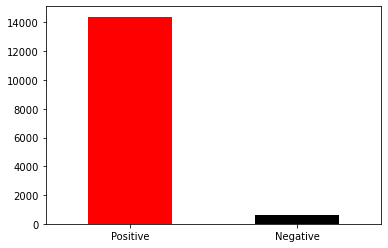

In [24]:
result=df_all['sentiment'].value_counts()
result.plot(kind='bar', rot=0, color=['red','black'])

In [25]:
df_all['sentiment'].value_counts()

Positive    14402
Negative      598
Name: sentiment, dtype: int64

In [26]:
df_all['sentiment'].value_counts(normalize=True) * 100

Positive    96.013333
Negative     3.986667
Name: sentiment, dtype: float64

#### <font color='green'> KR : 96% of respondents gave positive responses based on the review text  </font>

### 5. Sentiment polarity

In [27]:
polarity_score=[]
for i in range (0, df_all.shape[0]):
    score = TextBlob(df_all.iloc[i][9])
    score1= score.sentiment[0]
    polarity_score.append(score1)

In [28]:
df_final=pd.concat([df_all, pd.Series(polarity_score)], axis=1)

In [29]:
df_final.head()

,overall,verified,reviewTime,reviewerID,reviewerName,reviewText,summary,unixReviewTime,image,Text1,neg,neu,pos,compound,sentiment,0
0,2,False,"09 22, 2016",A1IDMI31WEANAF,Mackenzie Kent,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...,1474502400,NaN,come dm screen space screen absolute premium f...,0.310,0.646,0.044,-0.9152,Negative,-0.242857
1,1,False,"09 18, 2016",A4BCEVVZ4Y3V3,Jonathan Christian,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...,1474156800,NaN,open letter galeforce9 unpainted miniature bad...,0.204,0.544,0.252,0.7020,Positive,-0.040608
2,3,True,"09 12, 2016",A2EZ9PY1IHHBX0,unpreparedtodie,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless",1473638400,NaN,nice art nice printing two panel filled genera...,0.191,0.578,0.231,0.6606,Positive,0.125457
3,5,True,"03 02, 2017",A139PXTTC2LGHZ,Ashley,Amazing buy! Bought it as a gift for our new d...,Five Stars,1488412800,NaN,amazing buy bought gift new dm perfect,0.000,0.278,0.722,0.8860,Positive,0.578788
4,1,True,"02 08, 2017",A3IB33V29XIL8O,Oghma_EM,As my review of GF9's previous screens these w...,Money trap,1486512000,NaN,review gf9s previous screen completely unneces...,0.370,0.630,0.000,-0.7063,Negative,-0.316667


In [30]:
df_final.rename(columns={df_final.columns[15]:"polarity"}, inplace=True)

In [31]:
df_final.sort_values(by='polarity', ascending=False).head()

,overall,verified,reviewTime,reviewerID,reviewerName,reviewText,summary,unixReviewTime,image,Text1,neg,neu,pos,compound,sentiment,polarity
5659,4,True,"05 28, 2015",A1X1C57YHYC6FL,Jesse,Awesome,Four Stars,1432771200,NaN,awesome,0.0,0.000,1.000,0.6249,Positive,1.0
11500,5,True,"02 24, 2016",A3UXPTXWEQLLQN,Pamela,Excellent way to start conversations,Five Stars,1456272000,NaN,excellent way start conversation,0.0,0.448,0.552,0.5719,Positive,1.0
5433,5,True,"10 4, 2015",A2GYC7J0YYDF5H,Jacob,Awesome,Five Stars,1443916800,NaN,awesome,0.0,0.000,1.000,0.6249,Positive,1.0
9272,5,True,"12 25, 2014",A3HRVTVNPFSC1Y,larissa roark,Just as picture. Perfect gift !,Perfect gift!,1419465600,NaN,picture perfect gift,0.0,0.132,0.868,0.7650,Positive,1.0
13623,5,True,"05 19, 2014",AUKHNCZUUFCUS,Nancy H Chace,It was perfect since she picked it out herself...,The eleven-year old loves it.,1400457600,NaN,perfect since picked lettering queen purchased...,0.0,0.537,0.463,0.7845,Positive,1.0


In [34]:
# Top 20 positive reviews
df_top20_pos= df_final.sort_values(by='polarity', ascending=False).iloc[:20,5]
df_top20_pos

5659                                               Awesome
11500                 Excellent way to start conversations
5433                                               Awesome
9272                       Just as picture. Perfect gift !
13623    It was perfect since she picked it out herself...
9269                                            Awesome!!!
5420                                       excellent trade
13607                                           Awesome!!!
3222                                          Perfect give
9514                    Perfect condition when it arrived!
13605    Came in excellent shape. Haven't opened-as is ...
8902                                               Awesome
14734                             Perfect to go with book.
524                         Perfect, just what I ordered!!
8928                      Had the best season with my elf.
9505           He is perfect we can't wait to get started.
14761                                       it was perfe

In [35]:
# Top 20 negative reviews
df_top20_neg=df_final.sort_values(by='polarity', ascending=True).iloc[:20,5]
df_top20_neg

3359                some of the suggestions are disgusting
2043         Kids did not like it.  Thought it was boring.
8319     Awful. We did not receive what was advertised....
208      BOOO  UNLES YOU ARE PATIENT KNOW HOW TO MEASUR...
8758     I hate the holidays bcuz of the Elf, he was di...
13181    I do not under stand how you keep score or rea...
9143     Cliche and stupid. I should not drink and Amaz...
9260                                          Just stupid.
8398     I only recieved the book from this place when ...
7988     Was the elf on the shelf but it didn't have th...
12510    These stickers were not the same as the ones I...
9511     I haven't even taken it out of the box yet but...
526      Keeps clients engaged while helping them devel...
14285    I like this product for my daughter. She is in...
8860     She arrived today. I'm so disappointed in her ...
9058     This toy is designed to desensitize youngsters...
11971    Horrible and incomplete flash cards....DO NOT .